### Q.7 
Follow the approach developed in Section 2.2 to read the files for the female runners
and then process them using the functions in Section 2.3 to create a data frame for analysis.
You may need to generalize the createDF() and extractVariables() functions to handle
additional oddities in the raw text files.
### Q.10
We have seen that the 1999 runners were typically older than the 2012 runners.
Compare the age distribution of the [female] runners across all 14 years of the races. Use
quantile–quantile plots, boxplots, and density curves to make your comparisons. How do
the distributions change over the years? Was it a gradual change?

In [19]:
#setwd('C:/Users/danie/Documents/GitHub/Quantifying-The-World/Case Study 2')
setwd("C:/Users/N1110/Desktop/QTW/Jan30")
library(XML)
ubase = "http://www.cherryblossom.org/"

In [20]:

womenURLs = 
  c("results/1999/cb99f.html", 
    "results/2000/Cb003f.htm", 
    "results/2001/oof_f.html",
    "results/2002/ooff.htm", 
    "results/2003/CB03-F.HTM",
    "results/2004/womennet.htm", 
    "results/2005/womennet.htm", 
    "results/2006/womennet.htm", 
    "results/2007/women.htm", 
    "results/2008/women.htm", 
    "results/2009/09cucb-F.htm",
    "results/2010/2010cucb10m-f.htm", 
    "results/2011/2011cucb10m-f.htm",
    "results/2012/2012cucb10m-f.htm")

urls = paste(ubase, womenURLs, sep="")

In [21]:
extractResTable =

  function(url = "http://www.cherryblossom.org/results/2009/09cucb-F.htm",
           year = 1999, sex = "female", file = NULL)
  {
    doc = htmlParse(url, encoding="UTF-8")
    
    if (year == 2000) {
      ff = getNodeSet(doc, "//font")
      txt = xmlValue(ff[[4]])
      els = strsplit(txt, "\r\n")[[1]]
    }
    
    else if (year == 1999 & sex == "female") {
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\n")[[1]]   
    }
    else {
      pres = getNodeSet(doc, "//pre")
      txt = xmlValue(pres[[1]])
      els = strsplit(txt, "\r\n")[[1]]   
    } 
    
    if (is.null(file)) return(els)
    # Write the lines as a text file.
    writeLines(els, con = file)
  }

years = 1999:2012
womenTables = mapply(extractResTable, url = urls, year = years)

# womenTables <- list()
# for(i in 1:length(years)){
#   womenTables[[i]] <- try(extractResTable(url=urls[i], year=years[i]))
# }

womenTables = mapply(extractResTable, url = urls, year = years)
names(womenTables) = years
sapply(womenTables, length)


#### Confirmation that the 1999 and other years have consistent formatting
womenTables$'1999'[1:10]
womenTables[[2]][1:10]

#### Save the outputs to R data
save(womenTables, file = "CBWomenTextTables.rda")

1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 
2359 2169 2976 3338 3547 3907 4342 5445 5699 6405 8333 8863 9038 9737

[1] ""                                                                          
 [2] "PLACE DIV /TOT  NAME                  AG HOMETOWN           TIME    PACE  "
 [3] "===== ========= ===================== == ================== ======= ===== "
 [4] "    1    1/1683 Jane Omoro            26 Kenya                53:37  5:22 "
 [5] "    2    2/1683 Jane Ngotho           29 Kenya                53:38  5:22 "
 [6] "    3           Lidiya Grigoryeva        Russia               53:40  5:22 "
 [7] "    4    3/1683 Eunice Sagero         20 Kenya                53:55  5:24 "
 [8] "    5    4/1683 Alla Zhilyayeva       29 Russia               54:08  5:25 "
 [9] "    6    5/1683 Teresa Wanjiku        24 Kenya                54:10  5:25 "
[10] "    7    6/1683 Elana Viazova         38 Ukraine              54:29  5:27 "

[1] "PLACE DIV /TOT  NUM   NAME                  AG HOMETOWN           GUN TIM  NET TIM "
 [2] "===== ========= ===== ===================== == ================== =======  ======= "
 [3] "    1    1/1503  7005 Teresa Wanjiku        25 Kenya                55:53#   55:50 "
 [4] "    2    2/1503  7001 Jane Omoro            27 Kenya                55:58#   55:56 "
 [5] "    3    3/1503  7008 Jane Ngotho           32 Kenya                56:04#   56:01 "
 [6] "    4    4/1503  7007 Nuta Olaru            29 Romania              56:07#   56:06 "
 [7] "    5    5/1503  7014 Salena Chirchir       31 Kenya                57:34#   57:31 "
 [8] "    6    6/1503  7010 Alisa Harvey          34 Manassas VA          58:06    58:03 "
 [9] "    7    7/1503  7061 Martha Merz           37 Mystic CT            59:55*   59:51 "
[10] "    8    8/1503  7011 Lori Stich            29 Stanwood MI        1:00:22  1:00:20 "

In [22]:
#### Save the outputs to text files to stay in sync with the book
# first3 = substr(womenTables[[14]], 1,3)
#  which(first3 == "===")

els=womenTables[[14]]
eqIndex = grep("^===", els)

spacerRow = els[eqIndex]
headerRow = els[eqIndex - 1]
headerRow = tolower(headerRow)
ageStart = regexpr("ag", headerRow)
body = els[ -(1:eqIndex) ]
age = substr(body, start = ageStart, stop = ageStart + 1)
blankLocs = gregexpr(" ", spacerRow)
searchLocs = c(0, blankLocs[[1]])

Values = mapply(substr, list(body),
                start = searchLocs[ -length(searchLocs)] + 1,
                stop = searchLocs[ -1 ] - 1)

findColLocs = function(spacerRow) {
  spaceLocs = gregexpr(" ", spacerRow)[[1]]
  rowLength = nchar(spacerRow)
  
  if (substring(spacerRow, rowLength, rowLength) != " ")
    return( c(0, spaceLocs, rowLength + 1))
  else return(c(0, spaceLocs))
}

selectCols = function(colNames, headerRow, searchLocs)
  {
  sapply(colNames,
         function(name, headerRow, searchLocs)
           {
           startPos = regexpr(name, headerRow)[[1]]
           if (startPos == -1)
             return( c(NA, NA) )
           
           index = sum(startPos >= searchLocs)
           c(searchLocs[index] + 1, searchLocs[index + 1])
           #c(searchLocs[index] + 1, searchLocs[index + 1] - 1)
           },
         headerRow = headerRow, searchLocs = searchLocs )
  } 


searchLocs = findColLocs(spacerRow)
ageLoc = selectCols("ag", headerRow, searchLocs)
ages = mapply(substr, list(body),
              start = ageLoc[1,], stop = ageLoc[2, ])

#summary(as.numeric(ages))

shortColNames = c("name", "home", "ag", "gun", "net", "time")
#Verify that age is consistent in all files
womenTables[[1]][1:5]
womenTables[[2]][1:5]
####WomenTables[[3]] has no header row####
womenTables[[3]][1:10]
womenTables[[4]][1:5]
womenTables[[5]][1:5]
womenTables[[6]][1:10]
womenTables[[7]][1:10]
womenTables[[8]][1:10]
womenTables[[9]][1:10]
womenTables[[10]][1:10]
womenTables[[11]][1:10]
womenTables[[12]][1:10]
womenTables[[13]][1:10]
womenTables[[14]][1:10]

locCols = selectCols(shortColNames, headerRow, searchLocs)

Values = mapply(substr, list(body), start = locCols[1, ],
                stop = locCols[2, ])

#class(Values)
colnames(Values) = shortColNames

extractVariables =
  function(file, varNames =c("name", "home", "ag", "gun",
                             "net", "time"))
    {
  
    eqIndex = grep("^===", file)
    spacerRow = file[eqIndex]
    headerRow = tolower(file[ eqIndex - 1 ])
    blanks = grep("^[[:blank:]]*$", womenTables[['2005']])
    body = file[ -(1 : eqIndex) ]
    searchLocs = findColLocs(spacerRow)
    locCols = selectCols(varNames, headerRow, searchLocs)
    Values = mapply(substr, list(body), start = locCols[1, ],
                    stop = locCols[2, ])
    colnames(Values) = varNames
    
    invisible(Values) #Use invisible in place of return in a function when the returned output should not be printed.
  }

##Tee hee lets be clever
womenTables[[3]][1:3]<-womenTables[[4]][1:3]
womenResMat = lapply(womenTables[1:14], extractVariables)
#length(womenResMat)
#sapply(womenResMat, nrow)

#########################Data Cleansing#######################################
#age = sapply(womenResMat, function(x) as.numeric(x[ , 'ag']))
#boxplot(age, ylab = "Age", xlab = "Year")
#age<-as.numeric(womenResMat[['2012']][ , 'ag'])
#unique(age)
#boxplot(age, ylab = "Age", xlab = "Year")
#sapply(age, function(x) sum(is.na(x)))

###########Found that women data ages are not as terrible as the men's were.
###########We may want to lok at NAs in 2005 and a youngster in 2001
#i.e.
# sapply(age, function(x) sum(is.na(x)))
# 1999 2000 2001 2002 2003 2004 2005 2006 2007 
# 4    1    1    5    2    2   11    3    4 
# 2008 2009 2010 2011 2012 
# 0    4    2    0    0 

createDF =
  function(Res, year, sex)
  {
    # Determine which time to use
    # useTime = if( !is.na(Res[1, 'net']) )
    #   Res[ , 'net']
    # else if( !is.na(Res[1, 'gun']) )
    #   Res[ , 'gun']
    # else
    #   Res[ , 'time']
    #runTime = convertTime(useTime)
    Results = data.frame(year = rep(year, nrow(Res)),
                         sex = rep(sex, nrow(Res)),
                         name = Res[ , 'name'],
                         home = Res[ , 'home'],
                         age = as.numeric(Res[, 'ag']),
                         #runTime = runTime,
                         stringsAsFactors = FALSE)
    invisible(Results)
  }

womenDF = mapply(createDF, womenResMat, year = 1999:2012,
               sex = rep("F", 14), SIMPLIFY = FALSE)

#sapply(womenDF, function(x) sum(is.na(x$age)))
cbWomenDF = do.call(rbind, womenDF)


#document records with missing ages
missingAges<-cbWomenDF[is.na(cbWomenDF$age),]
#missingAges

#Remove records with missing ages
cbWomenDF=cbWomenDF[! is.na(cbWomenDF[,5]),]

save(cbWomenDF, file = "cbWomen.rda")

[1] ""                                                                          
[2] "PLACE DIV /TOT  NAME                  AG HOMETOWN           TIME    PACE  "
[3] "===== ========= ===================== == ================== ======= ===== "
[4] "    1    1/1683 Jane Omoro            26 Kenya                53:37  5:22 "
[5] "    2    2/1683 Jane Ngotho           29 Kenya                53:38  5:22 "

[1] "PLACE DIV /TOT  NUM   NAME                  AG HOMETOWN           GUN TIM  NET TIM "
[2] "===== ========= ===== ===================== == ================== =======  ======= "
[3] "    1    1/1503  7005 Teresa Wanjiku        25 Kenya                55:53#   55:50 "
[4] "    2    2/1503  7001 Jane Omoro            27 Kenya                55:58#   55:56 "
[5] "    3    3/1503  7008 Jane Ngotho           32 Kenya                56:04#   56:01 "

[1] ""                                                                        
 [2] "                                                                 "       
 [3] "                      "                                                  
 [4] "    1  6002 Elana MEYER           34 Rep Of S.africa      52:15   52:16#"
 [5] "    2  6004 Lydia GRIGORIEVA      27 Russia               53:12   53:15#"
 [6] "    3  6019 Eyerusalem KUMA       20 Ethiopia             53:16   53:19#"
 [7] "    4  6007 Milena GLUSAC         25 Usa                  53:33   53:34#"
 [8] "    5  6012 Olga KOVPOTINA        31 Russia               54:01   54:03#"
 [9] "    6  6020 Merima HASHIM         20 Ethiopia             54:29   54:31#"
[10] "    7  6005 Jane OMORO            27 Kenya                55:05   55:08#"

[1] ""                                                                        
[2] "Place Num   Name                  Ag Hometown           Net     Gun     "
[3] "===== ===== ===================== == ================== ======= ======= "
[4] "    1  6005 Luminita TALPOS       29 Rom                  52:50   52:50 "
[5] "    2  6003 Teyba ERKASSO         20 Eth                  52:53   52:55 "

[1] ""                                                                                             
[2] "Place Div /Tot  Num    Name                          Ag Hometown            Gun Tim  Net Tim "
[3] "===== ========= ===== ============================= == =================== =======  ======= " 
[4] "    1    1/2510  6014  Olga Romanova                 22  RUS                  53:43#   53:42 "
[5] "    2    2/2510  6004  Asha Gigi                     30  ETH                  53:49#   53:49 "

[1] "                                                                   "                        
 [2] "               Credit Union Cherry Blossom 10 Mile Road Race"                               
 [3] "                              Washington, DC"                                               
 [4] "                           Sunday, April 4, 2004"                                           
 [5] "                         Official Women's Results "                                         
 [6] ""                                                                                           
 [7] "Place Div /Tot  Num   Name                          Ag Hometown            Net     Gun     "
 [8] "===== ========= ===== ============================= == =================== ======= ======= "
 [9] "    1    1/2902     4 Isabella Ochichi              24  KEN                  52:06   52:07 "
[10] "    2    2/2902    36 Catherine Ndereba             31  KEN                  52:58   53:00 "

[1] "                                                                      "             
 [2] "               Credit Union Cherry Blossom 10 Mile Road Race"                       
 [3] "                              Washington, DC"                                       
 [4] "                           Sunday, April 3, 2005"                                   
 [5] "                         Official Women's Results "                                 
 [6] ""                                                                                   
 [7] "Place Div /Tot  Name                   Ag Hometown           Net     Gun     Pace  "
 [8] "===== ========= ====================== == ================== ======= ======= ===== "
 [9] "    1    1/3146 Nuta Olaru             34 Romania              52:01   52:01  5:13 "
[10] "    2    2/3146 Alvetina Ivanova       29 Russia               53:17   53:17  5:20 "

[1] ""                                                                                         
 [2] "               Credit Union Cherry Blossom 10 Mile Road Race"                             
 [3] "                              Washington, DC"                                             
 [4] "                           Sunday, April 2, 2006"                                         
 [5] "                Women's Official Results Sorted By Gun Time"                              
 [6] ""                                                                                         
 [7] "Place Div/Tot  Num    Name                   Ag Hometown        Net Tim Gun Tim  Pace  S "
 [8] "===== ======== ====== ====================== == ======================= =======  ===== = "
 [9] "    1   1/4069      4 Lidiya Grigoryeva      32 Russia            52:11   52:11#  5:14 ! "
[10] "    2   2/4069      6 Alevtina Ivanova       30 Russia            52:39   52:39#  5:16 ! "

[1] "               Credit Union Cherry Blossom 10 Mile Road Race"                                   
 [2] "                              Washington, DC"                                                   
 [3] "                           Sunday, April 1, 2007"                                               
 [4] "                  Official Female Results With 10km Split"                                      
 [5] ""                                                                                               
 [6] "Place Div  /Tot   Num    Name                   Ag Hometown           Time     Pace  S Split   "
 [7] "===== =========== ====== ====================== == ================== =======  ===== = ======= "
 [8] "    1     1/728        4 Teyba Erkesso          24 Ethiopia             51:44#  5:11 !   32:06 "
 [9] "    2     2/728       16 Tatyana Petrova        23 Russia Germant.      52:58#  5:18 !   32:47 "
[10] "    3     1/1083       8 Kathy Butler           33 United Kingdom       53:26#  5:21 !   33:02 "

[1] ""                                                                                                                
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                                       
 [3] "                 Washington, DC     Sunday, April 6, 2008"                                                       
 [4] ""                                                                                                                
 [5] "                          Official Female Results"                                                               
 [6] ""                                                                                                                
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown           5 Mi    Pace  10 Km   Pace  Time    Pace  "
 [8] "===== =========== ====== ====================== == ================== ======= ===== ======= ===== ======= ===== "
 [9] "    1     1/783       10 Lineth Chepkurui       20 Kenya                27:49  5:34   34:21  5:32   54:21  5:27 "
[10] "    2     1/1994      18 Angelina Mutuku        25 Kenya                27:50  5:34   34:22  5:32   54:39  5:28 "

[1] ""                                                                                                 
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                        
 [3] "                 Washington, DC     Sunday, April 5, 2009"                                        
 [4] ""                                                                                                 
 [5] "               Female Official Results (Sorted By Net Time)"                                      
 [6] ""                                                                                                 
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             Gun Tim Net Tim  Pace  S "
 [8] "===== =========== ====== ====================== == ==================== ======= =======  ===== = "
 [9] "    1     1/953        2 Lineth Chepkurui       21 Kenya                  53:32   53:32#  5:22 ! "
[10] "    2     2/953       22 Belianesh Zemed Gebre  21 Ethiopia               53:55   53:55#  5:24 ! "

[1] ""                                                                                                         
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                                
 [3] "                 Washington, DC     Sunday, April 11, 2010"                                               
 [4] ""                                                                                                         
 [5] "               Female Official Results (Sorted By Net Time)"                                              
 [6] ""                                                                                                         
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Gun Tim Net Tim  Pace  S "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= =======  ===== = "
 [9] "    1     1/971        2 Lineth Chepkurui       23 Kenya                  25:38   51:51   51:51#  5:12 ! "
[10] "    2     2/971       28 Julliah Tinega         24 Kenya                  25:41   52:40   52:39#  5:16 ! "

[1] ""                                                                                                        
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                               
 [3] "                 Washington, DC     Sunday, April 3, 2011"                                               
 [4] ""                                                                                                        
 [5] "               Female Official Results (Sorted By Net Time)"                                             
 [6] ""                                                                                                        
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Net Tim Pace  S "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ======= ===== = "
 [9] "    1     1/2706      14 Julliah Tinega         25 Kenya                          54:02   54:02  5:25 ! "
[10] "    2     1/937       16 Risper Gesabwa         22 Kenya                  27:17   54:03   54:03  5:25 ! "

[1] ""                                                                                                
 [2] "                 Credit Union Cherry Blossom Ten Mile Run"                                       
 [3] "                 Washington, DC     Sunday, April 1, 2012"                                       
 [4] ""                                                                                                
 [5] "               Female Official Results (Sorted By Net Time)"                                     
 [6] ""                                                                                                
 [7] "Place Div  /Tot   Num    Name                   Ag Hometown             5 Mile  Time    Pace  S "
 [8] "===== =========== ====== ====================== == ==================== ======= ======= ===== = "
 [9] "    1     1/2781       2 Jelliah Tinega         26 Kenya                  26:48   54:02  5:25 ! "
[10] "    2     2/2781      24 Malika Mejdoub         29 Ethiopia               27:09   54:24  5:27 ! "

Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"
Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"
Warning message in data.frame(year = rep(year, nrow(Res)), sex = rep(sex, nrow(Res)), :
"NAs introduced by coercion"


In [23]:
write.csv(cbWomenDF, file="cbWomenDF.csv", col.names=TRUE)

Warning message in write.csv(cbWomenDF, file = "cbWomenDF.csv", col.names = TRUE):
"attempt to set 'col.names' ignored"


In [24]:
head(cbWomenDF)

,year,sex,name,home,age
,<int>,<chr>,<chr>,<chr>,<dbl>
1999.1,1999,F,Jane Omoro,Kenya,26
1999.2,1999,F,Jane Ngotho,Kenya,29
1999.4,1999,F,Eunice Sagero,Kenya,20
1999.5,1999,F,Alla Zhilyayeva,Russia,29
1999.6,1999,F,Teresa Wanjiku,Kenya,24
1999.7,1999,F,Elana Viazova,Ukraine,38


In [27]:
str(cbWomenDF)

'data.frame':	76038 obs. of  5 variables:
 $ year: int  1999 1999 1999 1999 1999 1999 1999 1999 1999 1999 ...
 $ sex : chr  "F" "F" "F" "F" ...
 $ name: chr  "Jane Omoro            " "Jane Ngotho           " "Eunice Sagero         " "Alla Zhilyayeva       " ...
 $ home: chr  "Kenya              " "Kenya              " "Kenya              " "Russia             " ...
 $ age : num  26 29 20 29 24 38 27 30 30 37 ...


In [28]:
summary((cbWomenDF)) #Summary Statistics

      year          sex                name               home          
 Min.   :1999   Length:76038       Length:76038       Length:76038      
 1st Qu.:2005   Class :character   Class :character   Class :character  
 Median :2008   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2007                                                           
 3rd Qu.:2010                                                           
 Max.   :2012                                                           
      age       
 Min.   : 0.00  
 1st Qu.:27.00  
 Median :32.00  
 Mean   :33.85  
 3rd Qu.:39.00  
 Max.   :87.00  

[1] "brewer.pal"         "brewer.pal.info"    "display.brewer.all"
[4] "display.brewer.pal"

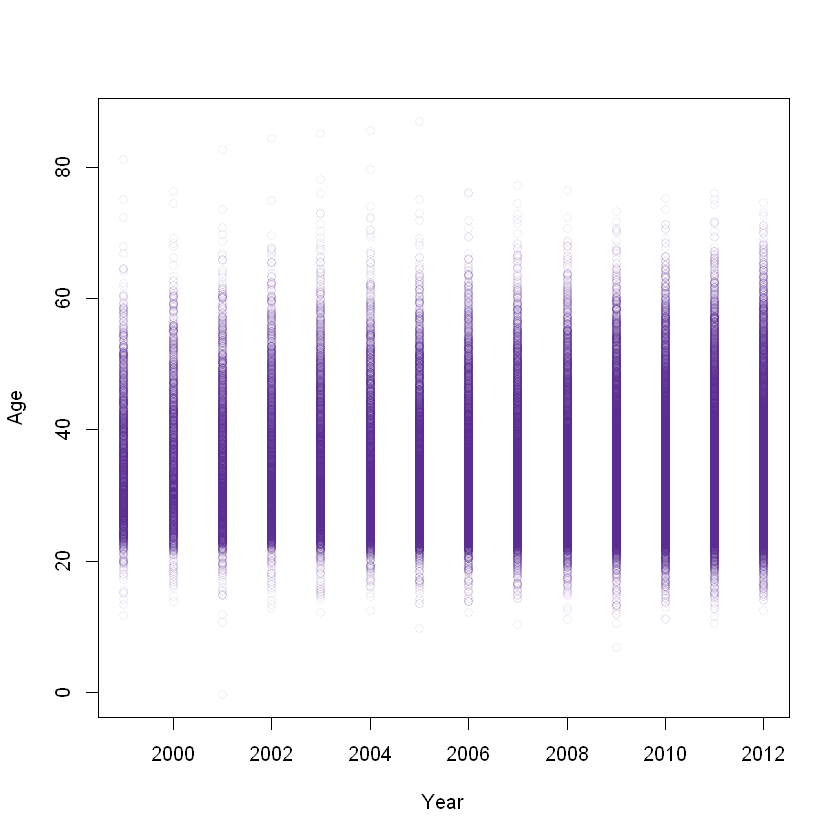

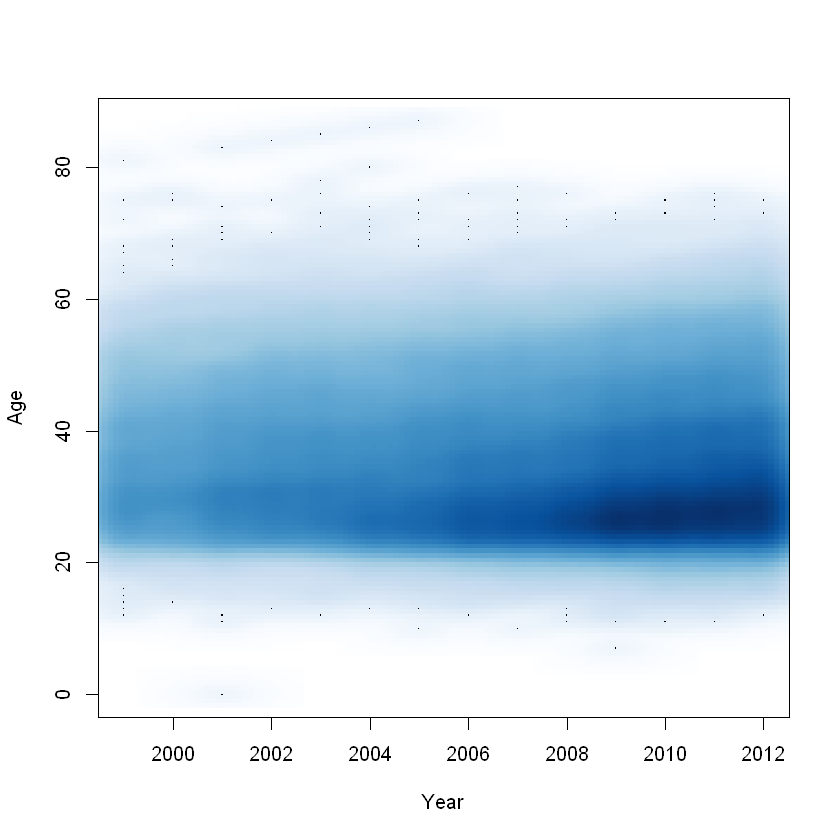

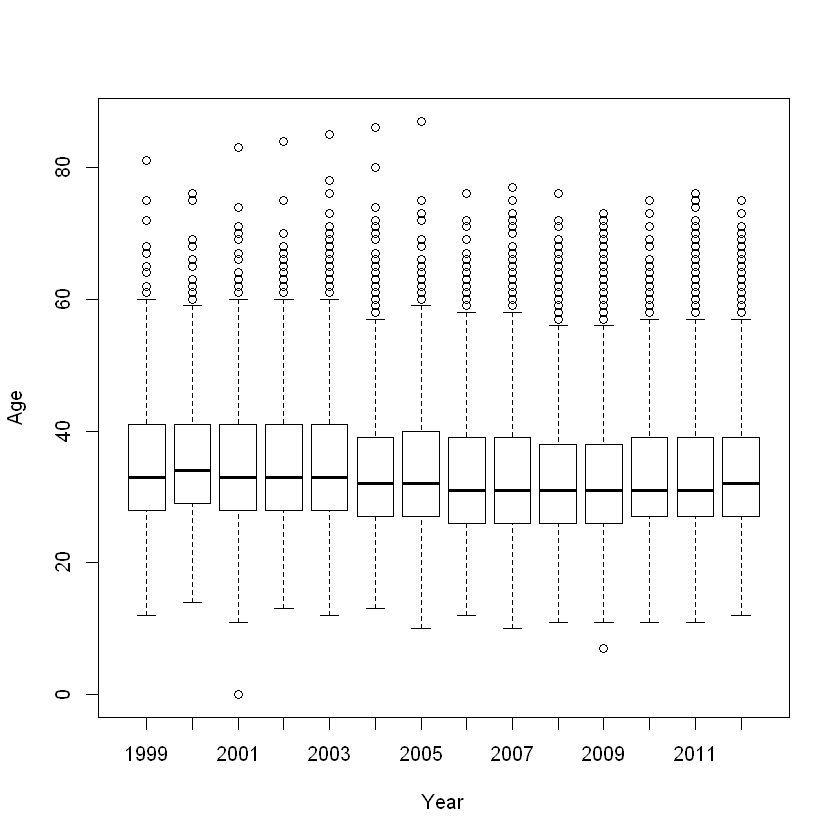

In [29]:
library(RColorBrewer) 
ls("package:RColorBrewer")
Purples8 = brewer.pal(9, "Purples")[8] 
Purples8A = paste(Purples8, "14", sep = "") 

#Jitter amount = .5 will randomly add/subtract to make ages not overlap so much
plot(jitter(cbWomenDF$age, amount = 0.5) ~ year, data = cbWomenDF, xlab = "Year", ylab = "Age",col=Purples8A )

smoothScatter(y = cbWomenDF$age, x = cbWomenDF$year,
               xlab = "Year", ylab = "Age")

boxplot(cbWomenDF$age~cbWomenDF$year, ylab = "Age", xlab = "Year")

In [30]:
#To see how well the simple linear model captures the relationship (or not)
lmAge = lm(cbWomenDF$year ~ cbWomenDF$age, data = cbWomenDF) 
lmAge$coefficients
summary(lmAge)

(Intercept) cbWomenDF$age 
2008.06401910   -0.02134829


Call:
lm(formula = cbWomenDF$year ~ cbWomenDF$age, data = cbWomenDF)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8078 -2.5303  0.7045  3.1101  5.5371 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)    2.008e+03  5.143e-02 39044.61   <2e-16 ***
cbWomenDF$age -2.135e-02  1.466e-03   -14.56   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.728 on 76036 degrees of freedom
Multiple R-squared:  0.002782,	Adjusted R-squared:  0.002769 
F-statistic: 212.1 on 1 and 76036 DF,  p-value: < 2.2e-16


In [12]:
#LEI 
#this unit changepoint (of mean, variance), loess (yr, age; LOESS curve, each with a different span), qq plot in R (1999 vs 2012)
#### Quantile-Quantile Plot. The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations 
#violin plot
#density plot in py(can plot all in one), year as group, age distribution all in one plot
#### year int need to as string

#ANOVA each year as a group?


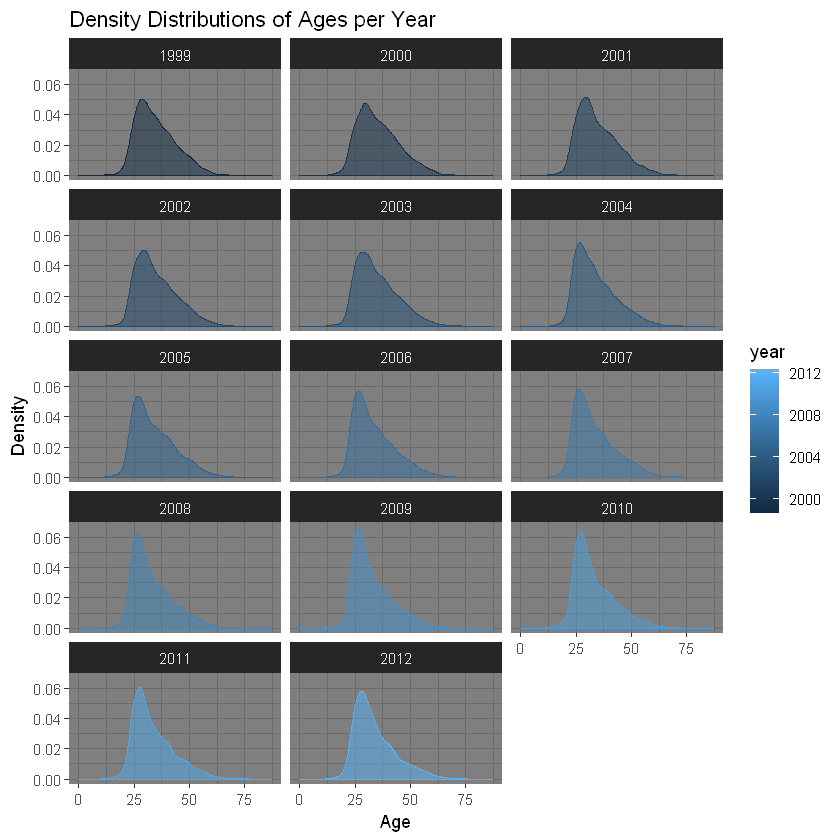

In [34]:
library(ggplot2)
ggplot(data=cbWomenDF, aes(age, group=year, fill=year, colour=year)) +
  geom_density(alpha = 0.5) +
  theme_dark() + 
  facet_wrap(~year, ncol=3) +
  labs(title="Density Distributions of Ages per Year", x="Age", y="Density")

In [15]:
head(cbWomenDF)
dim(cbWomenDF)

,year,sex,name,home,age
,<int>,<chr>,<chr>,<chr>,<dbl>
1999.1,1999,F,Jane Omoro,Kenya,26
1999.2,1999,F,Jane Ngotho,Kenya,29
1999.4,1999,F,Eunice Sagero,Kenya,20
1999.5,1999,F,Alla Zhilyayeva,Russia,29
1999.6,1999,F,Teresa Wanjiku,Kenya,24
1999.7,1999,F,Elana Viazova,Ukraine,38


[1] 76038     5

In [47]:
cbWomenDF2=cbWomenDF
#change year to factor
cbWomenDF2[,'year']<-factor(cbWomenDF2[,'year'])
head(cbWomenDF2)

,year,sex,name,home,age
,<fct>,<chr>,<chr>,<chr>,<dbl>
1999.1,1999,F,Jane Omoro,Kenya,26
1999.2,1999,F,Jane Ngotho,Kenya,29
1999.4,1999,F,Eunice Sagero,Kenya,20
1999.5,1999,F,Alla Zhilyayeva,Russia,29
1999.6,1999,F,Teresa Wanjiku,Kenya,24
1999.7,1999,F,Elana Viazova,Ukraine,38


In [97]:
# write.csv(cbWomenDF2, file="cbWomenDF2.csv", col.names=TRUE)

Warning message in write.csv(cbWomenDF2, file = "cbWomenDF2.csv", col.names = TRUE):
"attempt to set 'col.names' ignored"


In [41]:
library(GGally)
library(dplyr) 


Warning message:
"package 'dplyr' was built under R version 3.5.2"

Attaching package: 'dplyr'


The following object is masked from 'package:GGally':

    nasa


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




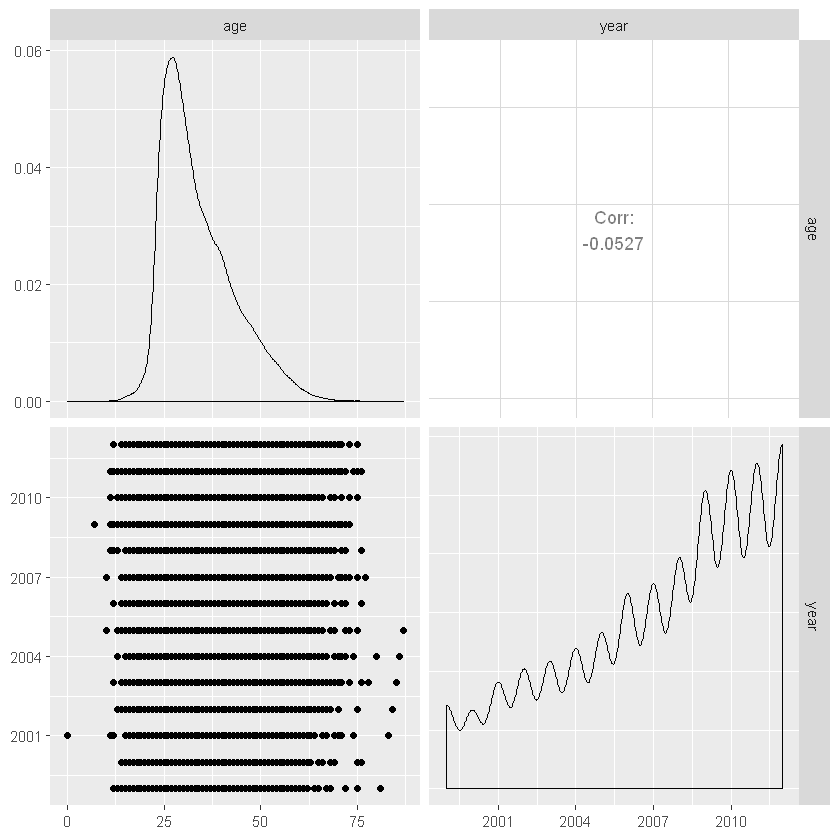

In [48]:
#chooses the columns 
cbWomenDF%>%select(age, year)%>%ggpairs

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



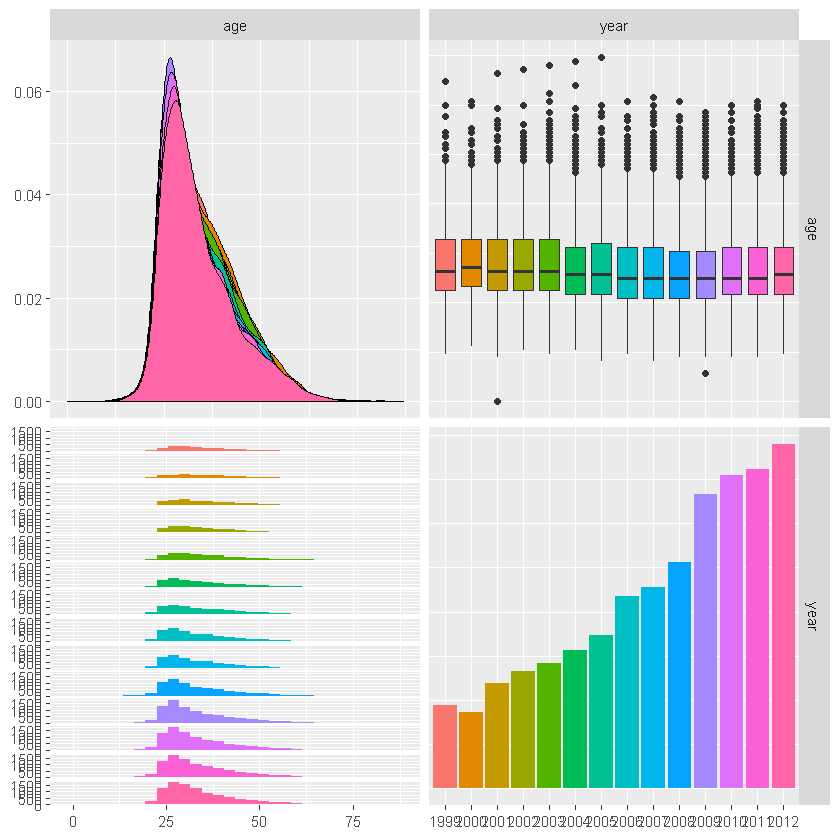

In [51]:
cbWomenDF2%>%select(age, year)%>%ggpairs(aes(color = year))

## If we focus on comparsion of year 1999 and 2012
#### it seems age distribution in females does not change drammatically. 
#### The phenomena "the 1999 runners were typically older than the 2012 runners" 
#### may caused by male runners since it describes the total population in the question.

## Quantile-Quantile Plot
### If age distributions of both years came from the same distribution, we should see the points forming a line that's roughly straight.

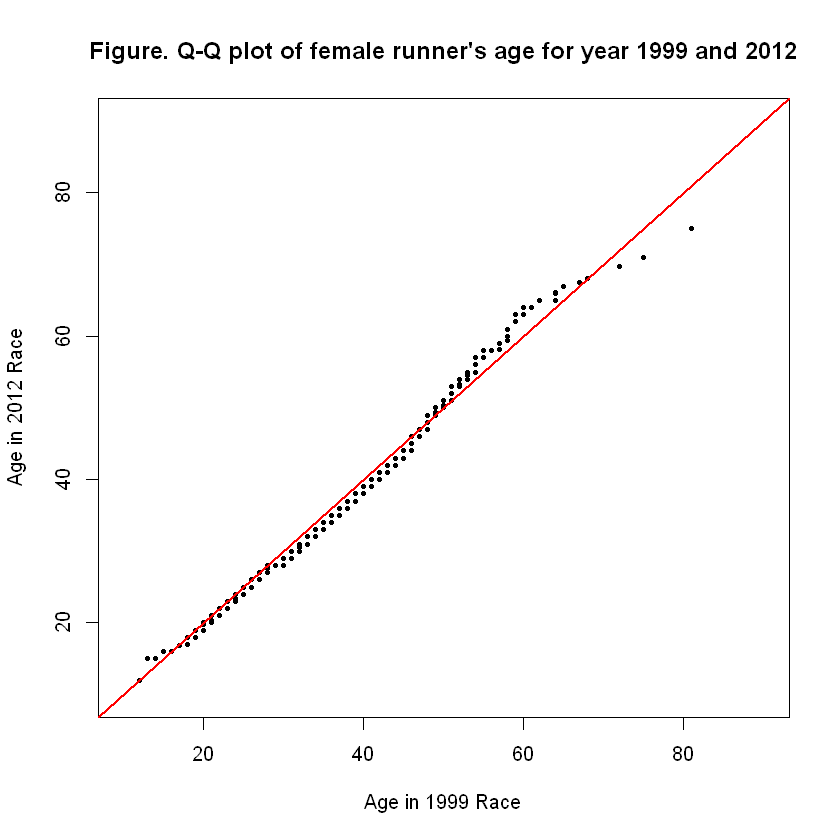

In [58]:
age1999 = cbWomenDF[ cbWomenDF$year == 1999, "age" ]
age2012 = cbWomenDF[ cbWomenDF$year == 2012, "age" ]
qqplot(age1999, age2012, pch = 19, cex = 0.5, 
       ylim = c(10,90), xlim = c(10,90), 
       xlab = "Age in 1999 Race",
       ylab = "Age in 2012 Race", 
       main = "Figure. Q-Q plot of female runner's age for year 1999 and 2012"
      )
abline(a =0, b = 1, col="red", lwd = 2)

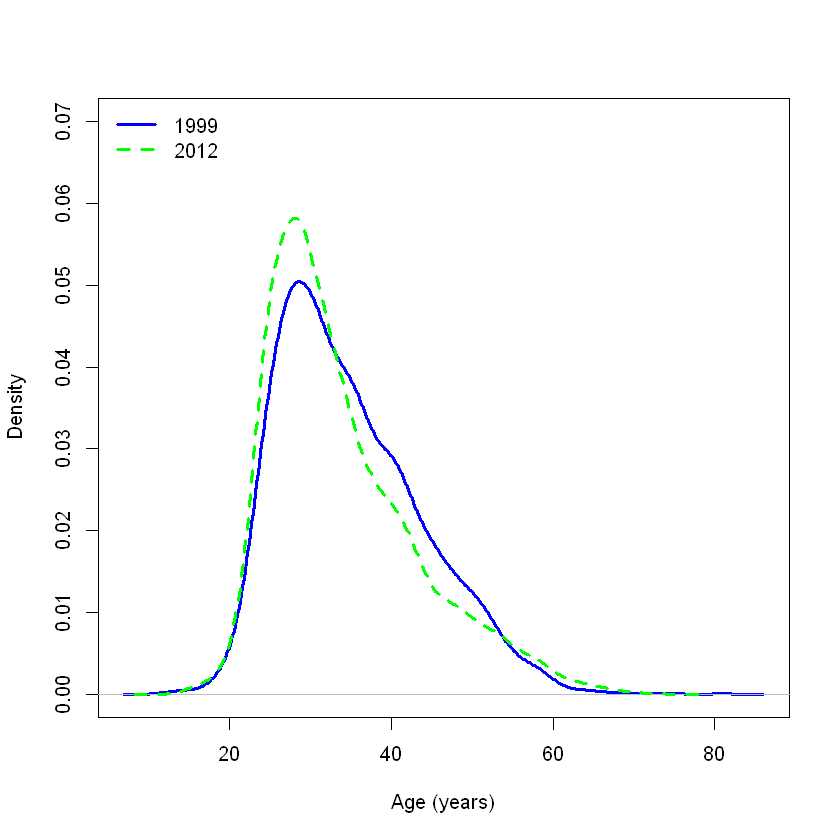

In [69]:
#focus on year 1999 and 2012
plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.07), col = "blue",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("blue", "green"), lty= 1:2, lwd = 3,
       legend = c("1999", "2012"), bty = "n")


## From the test results of One Way Anova of all year groups
#### which reports <2e-16
#### and stat significant
#### can reject the idea that all the populations have identical means.

### we can see there must be some change over the years. We will do a changepoint test to find out.


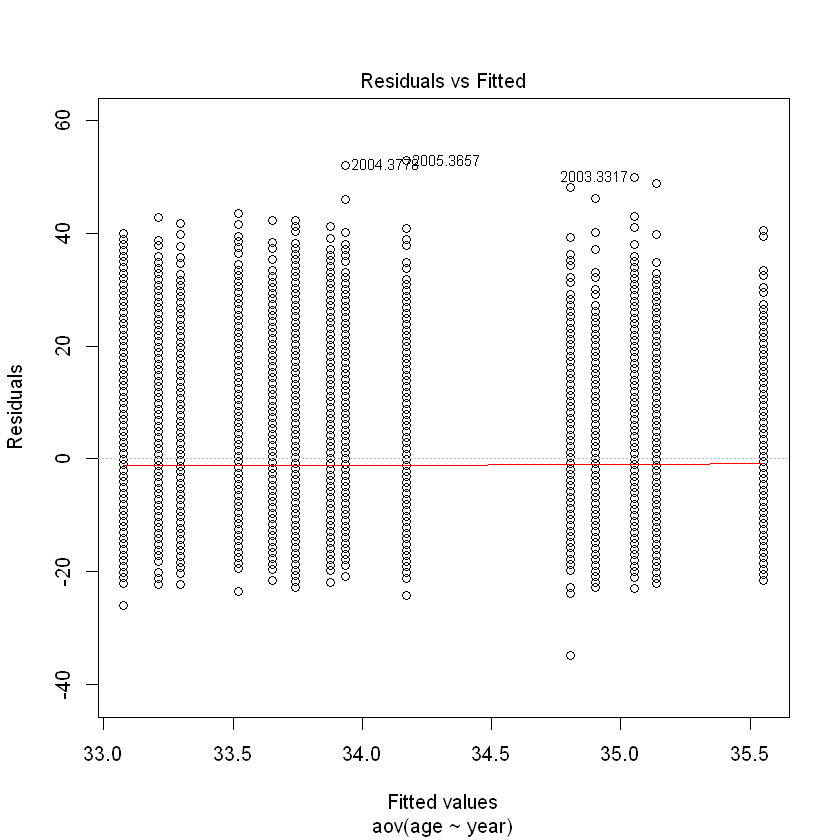

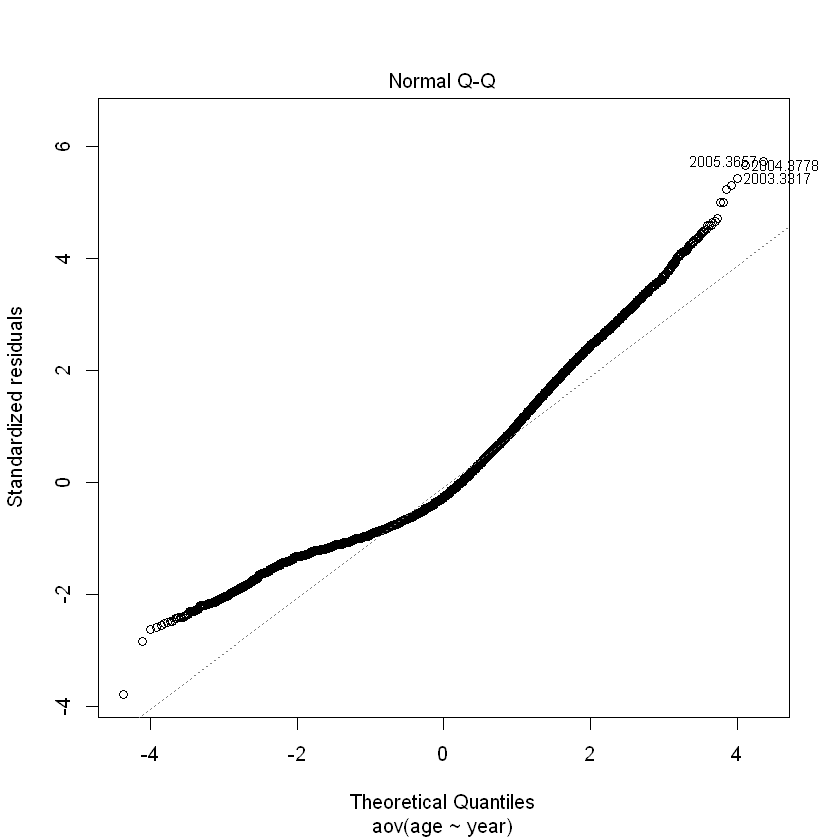

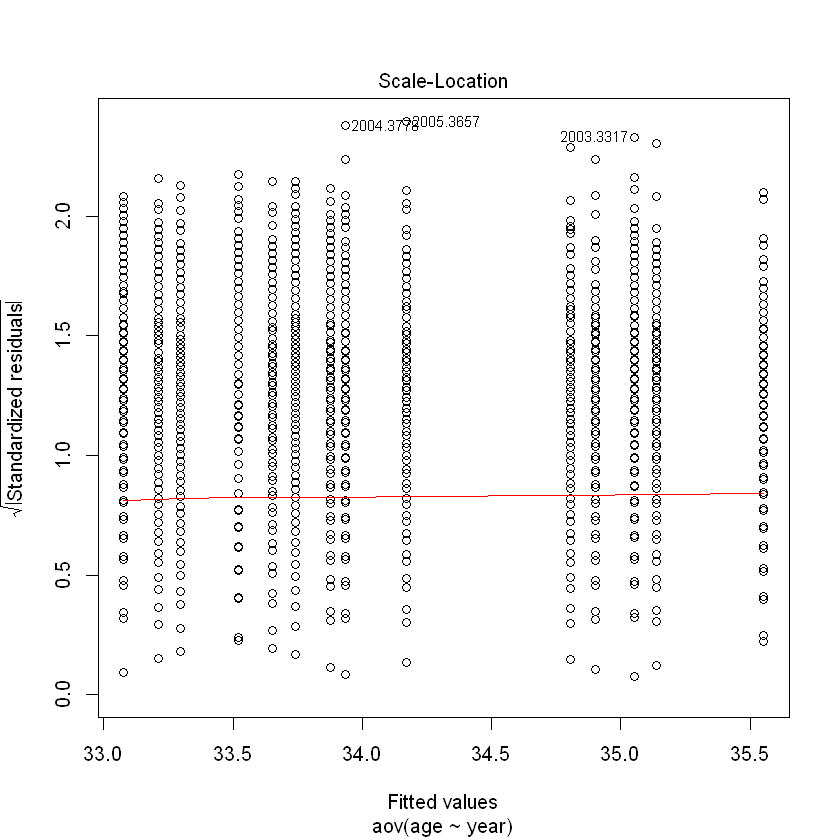

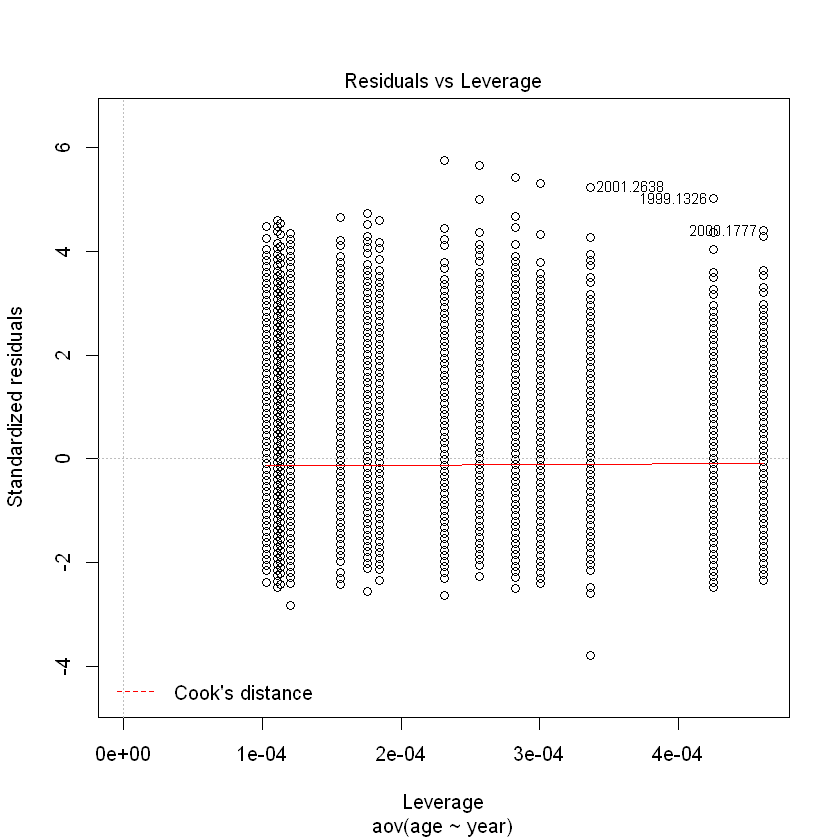

In [71]:
# all year group
# notice use DF2 where Year is factor

# One Way Anova (Completely Randomized Design)
fit <- aov(age ~ year, data=cbWomenDF2)
plot(fit)

In [72]:
summary(fit)

               Df  Sum Sq Mean Sq F value Pr(>F)    
year           13   33934  2610.3   30.84 <2e-16 ***
Residuals   76024 6433840    84.6                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [94]:
# in order to do a changepoint test, need to caculate the age mean for each yr using DF2
# create a year vs ageMean dataframe
# library(plyr)

# data points may not be enough


In [77]:
# ageMean<-ddply(cbWomenDF2, .(year), summarize, mean=mean(value))
# ageMean

# attach(cbWomenDF2)
# # aggregate(age~year, FUN=mean)

# ageMean <- by(age, year, mean)


library(data.table) 


Warning message:
"package 'data.table' was built under R version 3.5.2"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last




In [88]:
df=cbWomenDF2
ageMean1999 <- setDT(df[df$year == "1999", ])[, mean(age)]
ageMean2000 <- setDT(df[df$year == "2000", ])[, mean(age)]
ageMean2001 <- setDT(df[df$year == "2001", ])[, mean(age)]
ageMean2002 <- setDT(df[df$year == "2002", ])[, mean(age)]
ageMean2003 <- setDT(df[df$year == "2003", ])[, mean(age)]
ageMean2004 <- setDT(df[df$year == "2004", ])[, mean(age)]
ageMean2005 <- setDT(df[df$year == "2005", ])[, mean(age)]
ageMean2006 <- setDT(df[df$year == "2006", ])[, mean(age)]
ageMean2007 <- setDT(df[df$year == "2007", ])[, mean(age)]
ageMean2008 <- setDT(df[df$year == "2008", ])[, mean(age)]
ageMean2009 <- setDT(df[df$year == "2009", ])[, mean(age)]
ageMean2010 <- setDT(df[df$year == "2010", ])[, mean(age)]
ageMean2011 <- setDT(df[df$year == "2011", ])[, mean(age)]
ageMean2012 <- setDT(df[df$year == "2012", ])[, mean(age)]


In [89]:
ageMean=c(ageMean1999,ageMean2000, ageMean2001, ageMean2002, ageMean2003, ageMean2004, ageMean2005, ageMean2006, ageMean2007, ageMean2008, ageMean2009, ageMean2010, ageMean2011, ageMean2012)
ageMean

[1] 34.90094 35.55355 34.80619 35.13784 35.05138 33.93255 34.16925 33.65348
 [9] 33.52145 33.21025 33.07751 33.29707 33.74020 33.87799

In [95]:
agemedian1999 <- setDT(df[df$year == "1999", ])[, median(age)]
agemedian2000 <- setDT(df[df$year == "2000", ])[, median(age)]
agemedian2001 <- setDT(df[df$year == "2001", ])[, median(age)]
agemedian2002 <- setDT(df[df$year == "2002", ])[, median(age)]
agemedian2003 <- setDT(df[df$year == "2003", ])[, median(age)]
agemedian2004 <- setDT(df[df$year == "2004", ])[, median(age)]
agemedian2005 <- setDT(df[df$year == "2005", ])[, median(age)]
agemedian2006 <- setDT(df[df$year == "2006", ])[, median(age)]
agemedian2007 <- setDT(df[df$year == "2007", ])[, median(age)]
agemedian2008 <- setDT(df[df$year == "2008", ])[, median(age)]
agemedian2009 <- setDT(df[df$year == "2009", ])[, median(age)]
agemedian2010 <- setDT(df[df$year == "2010", ])[, median(age)]
agemedian2011 <- setDT(df[df$year == "2011", ])[, median(age)]
agemedian2012 <- setDT(df[df$year == "2012", ])[, median(age)]

In [96]:
agemedian=c(agemedian1999,agemedian2000, agemedian2001, agemedian2002, agemedian2003, agemedian2004, agemedian2005, agemedian2006, agemedian2007, agemedian2008, agemedian2009, agemedian2010, agemedian2011, agemedian2012)
agemedian

[1] 33 34 33 33 33 32 32 31 31 31 31 31 31 32

In [3]:


v1=c(34.9009353741497,35.5535549399815,34.8061911170929,35.1378378378378,35.0513833992095,33.9325468068736,34.1692485549133,33.6534781008465,33.5214486638537,33.2102548069408,33.0775147217882,33.2970744380436,33.7401993355482,33.8779936272998)

In [4]:


v2=c(33,34,33,33,33,32,32,31,31,31,31,31,31,32)

In [5]:
v1-v2
# mean always greater than median
# all yrs left skewed

[1] 1.900935 1.553555 1.806191 2.137838 2.051383 1.932547 2.169249 2.653478
 [9] 2.521449 2.210255 2.077515 2.297074 2.740199 1.877994

Warning message:
"package 'changepoint' was built under R version 3.5.3"
Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Successfully loaded changepoint package version 2.2.2
 NOTE: Predefined penalty values changed in version 2.2.  Previous penalty values with a postfix 1 i.e. SIC1 are now without i.e. SIC and previous penalties without a postfix i.e. SIC are now with a postfix 0 i.e. SIC0. See NEWS and help files for further details.



Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Sun Jan 26 05:21:12 2020 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in variance 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 7.917172 
Minimum Segment Length : 2 
Maximum no. of cpts   : 1 
Changepoint Locations :  


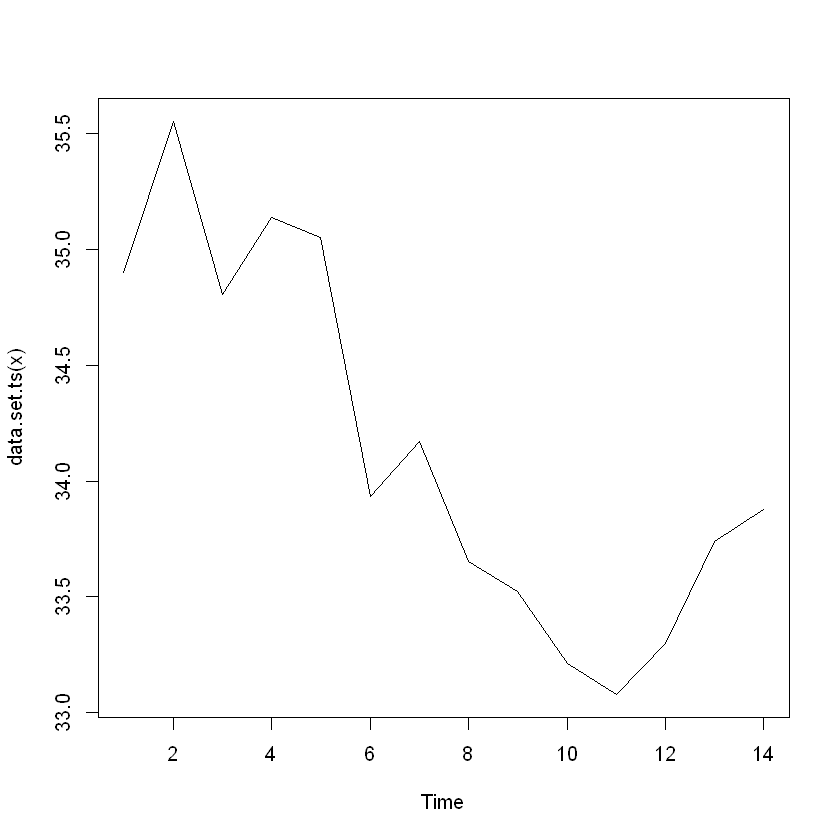

In [91]:
library(changepoint)
ansvar=cpt.var(ageMean)
plot(ansvar)
print(ansvar)

In [ ]:
# seems 2009 has the lowest meanAge

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Sun Jan 26 05:21:12 2020 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 7.917172 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations :  


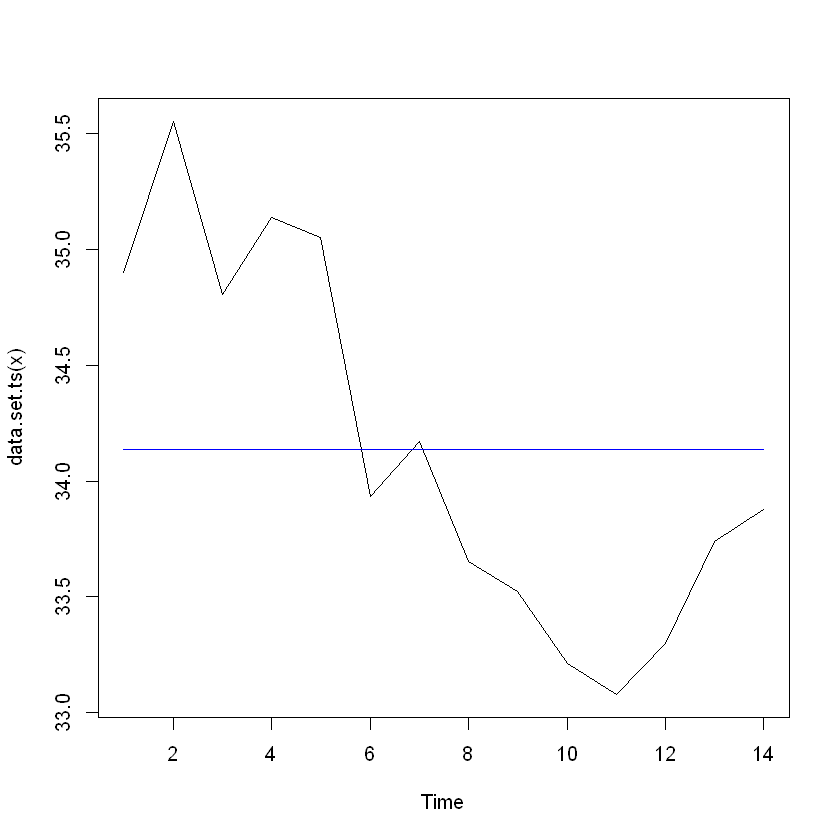

In [92]:
ansmean=cpt.mean(ageMean)
plot(ansmean,cpt.col='blue')
print(ansmean)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              cpttype date version data.set method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Sun Jan 26 05:21:12 2020 

summary(.)  :
----------
Created Using changepoint version 2.2.2 
Changepoint type      : Change in mean and variance 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 7.917172 
Minimum Segment Length : 2 
Maximum no. of cpts   : 1 
Changepoint Locations : 13 


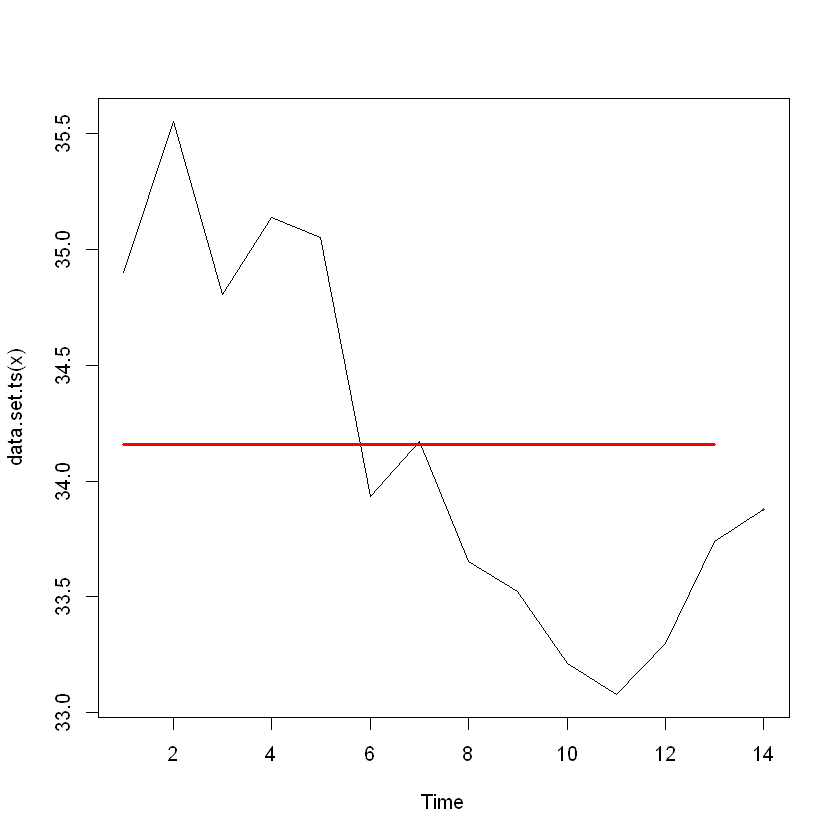

In [93]:
ansmeanvar=cpt.meanvar(ageMean)
plot(ansmeanvar,cpt.width=3)
print(ansmeanvar)

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"at  2012.1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"radius  0.004225"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"all data on boundary of neighborhood. make span bigger"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"pseudoinverse used at 2012.1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"neighborhood radius 0.065"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"reciprocal condition number  0.096465"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"There are other near singularities as well. 1"
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
"zero-width neighborhood. make span bigger"


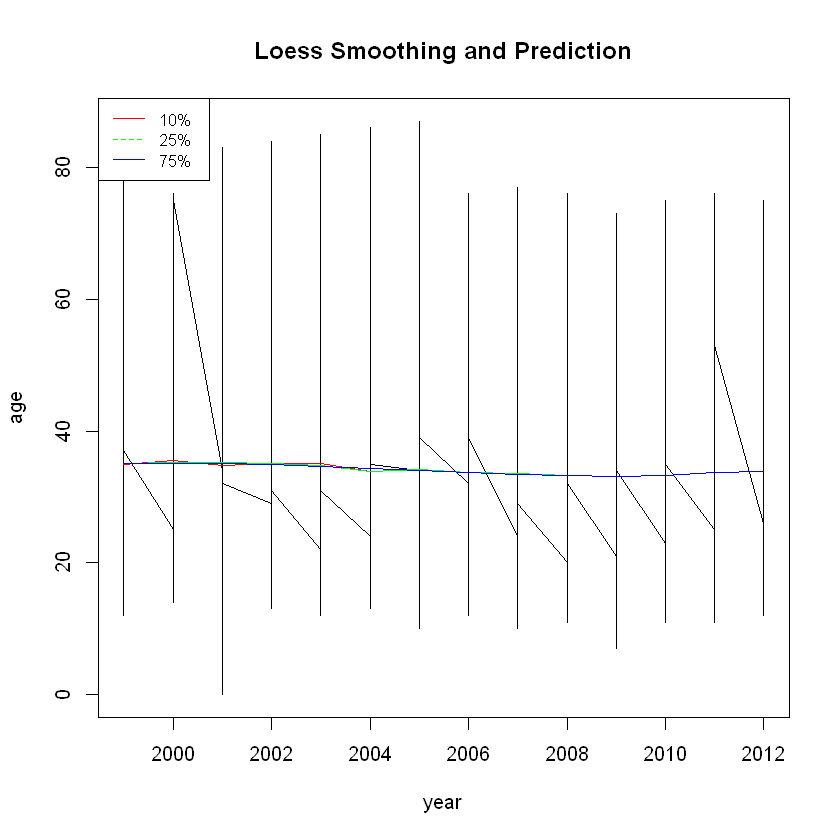

In [32]:
loessMod10 <- loess(age ~ year, data=cbWomenDF, span=0.10) # 10% smoothing span
loessMod25 <- loess(age ~ year, data=cbWomenDF, span=0.25) # 25% smoothing span
loessMod75 <- loess(age ~ year, data=cbWomenDF, span=0.75) # 75% smoothing span

smoothed10 <- predict(loessMod10) 
smoothed25 <- predict(loessMod25) 
smoothed75 <- predict(loessMod50)

# ref for code http://r-statistics.co/Loess-Regression-With-R.html

plot(cbWomenDF$age, x=cbWomenDF$year, type="l", main="Loess Smoothing and Prediction", xlab="year", ylab="age")
lines(smoothed10, x=cbWomenDF$year, col="red")
lines(smoothed25, x=cbWomenDF$year, col="green")
lines(smoothed75, x=cbWomenDF$year, col="blue")


legend("topleft", legend=c("10% ", "25%","75% "), col=c("red", "green","blue"),lty=1:2, cex=0.8 )
#ref http://www.sthda.com/english/wiki/add-legends-to-plots-in-r-software-the-easiest-way

In [8]:
setwd("C:/Users/N1110/Desktop/QTW/Jan30")


In [9]:
load("cbWomen.rda")

In [10]:
head(cbWomenDF)

,year,sex,name,home,age
,<int>,<chr>,<chr>,<chr>,<dbl>
1999.1,1999,F,Jane Omoro,Kenya,26
1999.2,1999,F,Jane Ngotho,Kenya,29
1999.4,1999,F,Eunice Sagero,Kenya,20
1999.5,1999,F,Alla Zhilyayeva,Russia,29
1999.6,1999,F,Teresa Wanjiku,Kenya,24
1999.7,1999,F,Elana Viazova,Ukraine,38


In [19]:
age1999 = cbWomenDF[ cbWomenDF$year == 1999, "age" ]
age2000 = cbWomenDF[ cbWomenDF$year == 2000, "age" ]
age2001 = cbWomenDF[ cbWomenDF$year == 2001, "age" ]
age2005 = cbWomenDF[ cbWomenDF$year == 2005, "age" ]
age2009 = cbWomenDF[ cbWomenDF$year == 2009, "age" ]
age2010 = cbWomenDF[ cbWomenDF$year == 2010, "age" ]
age2011 = cbWomenDF[ cbWomenDF$year == 2011, "age" ]
age2012 = cbWomenDF[ cbWomenDF$year == 2012, "age" ]

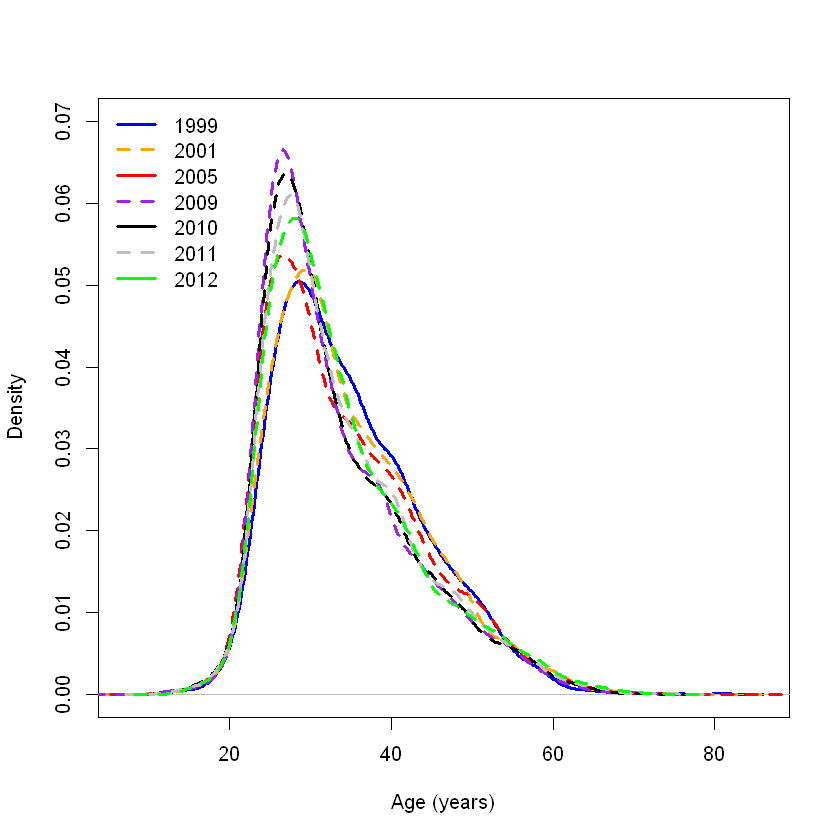

In [25]:
plot(density(age1999, na.rm = TRUE), 
     ylim = c(0, 0.07), col = "blue",
     lwd = 3,  xlab = "Age (years)",  main = "")
lines(density(age2001, na.rm = TRUE), 
      lwd = 3, lty = 2, col="orange")
lines(density(age2005, na.rm = TRUE), 
      lwd = 3, lty = 2, col="red")
lines(density(age2009, na.rm = TRUE), 
      lwd = 3, lty = 2, col="purple")
lines(density(age2010, na.rm = TRUE), 
      lwd = 3, lty = 2, col="black")
lines(density(age2011, na.rm = TRUE), 
      lwd = 3, lty = 2, col="grey")
lines(density(age2012, na.rm = TRUE), 
      lwd = 3, lty = 2, col="green")
legend("topleft", col = c("blue","orange","red","purple", "black","grey","green"), lty= 1:2, lwd = 3,
       legend = c("1999","2001","2005","2009", "2010","2011","2012"), bty = "n")

In [ ]:
# peak move to left, peak age decrease from 1999 to 2005 to 2009, 
# start to increase from 2010 to 2011 to 2012